# importing the required libraries

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing dataset

In [82]:
dataset = pd.read_csv("Advertising.csv")

# Exploratory data analysis

In [83]:
dataset.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [84]:
dataset.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [85]:
dataset.shape

(200, 5)

In [86]:
"""Dropping the unrequired columns from the dataset as it holds no impact in our model"""

'Dropping the unrequired columns from the dataset as it holds no impact in our model'

In [87]:
dataset.drop("Unnamed: 0",inplace = True,axis =1)

In [88]:
dataset.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [89]:
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Checking for any NAN values in every column

In [90]:
dataset["TV"].isnull().sum()

0

In [91]:
dataset["Radio"].isnull().sum()

0

In [92]:
dataset["Newspaper"].isnull().sum()

0

In [93]:
dataset["Sales"].isnull().sum()

0

In [94]:
"""As none of the column in the dataset contains any NAN value thus no steps for handling missing data is required"""

'As none of the column in the dataset contains any NAN value thus no steps for handling missing data is required'

# Visual representation of the data

<AxesSubplot:>

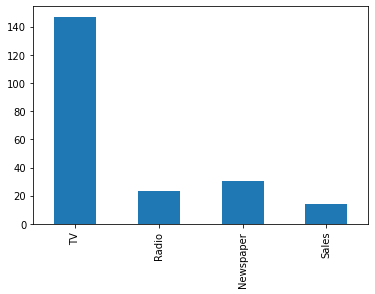

In [95]:
dataset.mean().plot(kind = "bar")

<AxesSubplot:ylabel='Frequency'>

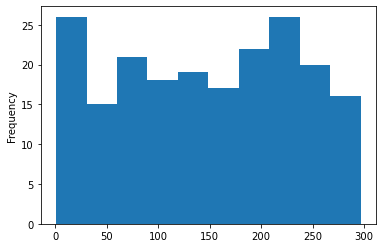

In [96]:
dataset["TV"].plot(kind = "hist")

<AxesSubplot:ylabel='Frequency'>

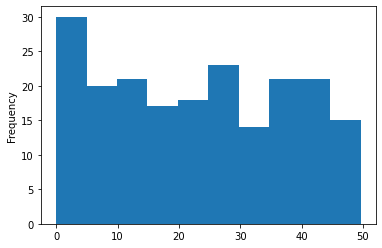

In [97]:
dataset["Radio"].plot(kind = "hist")

<AxesSubplot:ylabel='Frequency'>

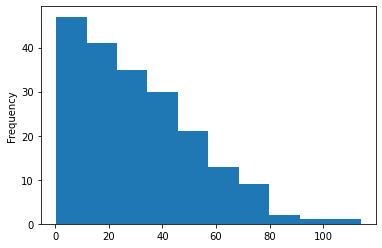

In [98]:
dataset["Newspaper"].plot(kind = "hist")

<AxesSubplot:ylabel='Frequency'>

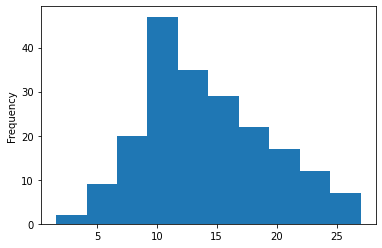

In [99]:
dataset["Sales"].plot(kind = "hist")

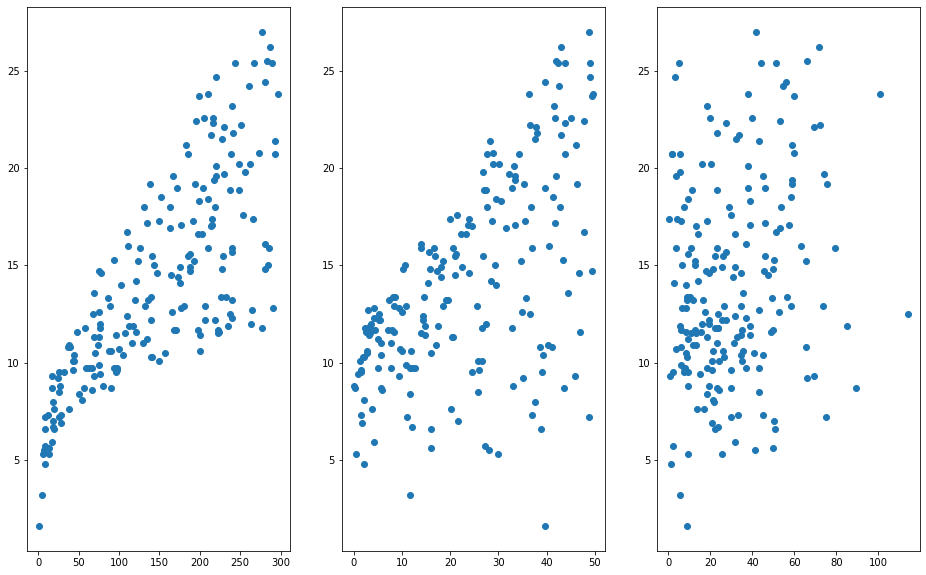

In [116]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols = 3,figsize = (16,10))
ax1.scatter(x = dataset["TV"],y=dataset["Sales"])
ax2.scatter(x = dataset["Radio"],y=dataset["Sales"])
ax3.scatter(x = dataset["Newspaper"], y = dataset["Sales"])

In [ ]:
"""Every row shows linear relationship with the output column.Thus we can apply Linear Regression"""

# Train Test Split 

In [119]:
from sklearn.model_selection import train_test_split

In [122]:
X = dataset.drop("Sales",axis = 1)

In [123]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [124]:
y = dataset["Sales"]

In [125]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [126]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [131]:
X_train.head(),X_train.shape

(        TV  Radio  Newspaper
 137  273.7   28.9       59.7
 163  163.5   36.8        7.4
 111  241.7   38.0       23.2
 123  123.1   34.6       12.4
 109  255.4   26.9        5.5,
 (160, 3))

In [129]:
X_test.head(),X_test.shape

(        TV  Radio  Newspaper
 112  175.7   15.4        2.4
 29    70.6   16.0       40.8
 182   56.2    5.7       29.7
 199  232.1    8.6        8.7
 193  166.8   42.0        3.6,
 (40, 3))

In [132]:
y_train.head(),y_test.head(),y_train.shape,y_test.shape

(137    20.8
 163    18.0
 111    21.8
 123    15.2
 109    19.8
 Name: Sales, dtype: float64,
 112    14.1
 29     10.5
 182     8.7
 199    13.4
 193    19.6
 Name: Sales, dtype: float64,
 (160,),
 (40,))

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [133]:
lr = LinearRegression()

In [134]:
lr.fit(X_train,y_train)

LinearRegression()

In [135]:
lr.coef_,lr.intercept_

(array([0.04735257, 0.17323832, 0.00466519]), 3.054452011581388)

In [137]:
lr.score(X,y)

0.8938190714163194

In [ ]:
"""The score of our model is 89.38%"""

In [138]:
y_pred = lr.predict(X_test)

In [139]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7575894500772719

In [ ]:
"""The r2 score of our model is 75.75"""